In [1]:
print("Ready.")

Ready.


In [2]:
import os
import signal

import chess
import chess.engine
import chess.pgn
import chess.polyglot

In [3]:
LC0_PATH = "/opt/homebrew/bin/lc0"
POLYGLOT_PATH = "./data/polyglot/codekiddy.bin"

## Playground

In [4]:
def get_db_moves(board, min_games):
    moves = []
    with chess.polyglot.open_reader(POLYGLOT_PATH) as reader:
        for entry in reader.find_all(board):
            if entry.weight >= min_games:
                moves.append(entry.move)
    return moves

In [5]:
def dfs(node, min_games):
    moves = get_db_moves(node.board(), min_games)
    for move in moves:
        next_node = node.add_variation(move)
        dfs(next_node, min_games)

game = chess.pgn.Game()
dfs(game, min_games=500)

In [6]:
print(game)

[Event "?"]
[Site "?"]
[Date "????.??.??"]
[Round "?"]
[White "?"]
[Black "?"]
[Result "*"]

1. e4 ( 1. d4 Nf6 ( 1... d5 2. c4 ( 2. Nf3 Nf6 ( 2... c6 3. c4 Nf6 4. Nc3 ( 4. e3 Bf5 5. Nc3 e6 6. Nh4 ) ( 4. Qc2 ) ( 4. Qb3 ) 4... e6 ( 4... dxc4 5. a4 Bf5 6. Ne5 ( 6. e3 e6 7. Bxc4 Bb4 8. O-O ) ) ( 4... a6 5. c5 ( 5. e3 ) ) 5. e3 ( 5. Bg5 h6 6. Bxf6 ( 6. Bh4 ) 6... Qxf6 ) 5... Nbd7 6. Qc2 ( 6. Bd3 dxc4 7. Bxc4 b5 8. Bd3 ) 6... Bd6 7. Bd3 ) 3. c4 e6 ( 3... c6 4. Nc3 ( 4. e3 Bf5 5. Nc3 e6 6. Nh4 ) ( 4. Qc2 ) ( 4. Qb3 ) 4... e6 ( 4... dxc4 5. a4 Bf5 6. Ne5 ( 6. e3 e6 7. Bxc4 Bb4 8. O-O ) ) ( 4... a6 5. c5 ( 5. e3 ) ) 5. e3 ( 5. Bg5 h6 6. Bxf6 ( 6. Bh4 ) 6... Qxf6 ) 5... Nbd7 6. Qc2 ( 6. Bd3 dxc4 7. Bxc4 b5 8. Bd3 ) 6... Bd6 7. Bd3 ) ( 3... dxc4 4. e3 e6 5. Bxc4 c5 6. O-O a6 ) 4. Nc3 ( 4. g3 dxc4 ( 4... Bb4+ 5. Bd2 ) 5. Bg2 ) ( 4. Bg5 ) 4... Be7 ( 4... c6 5. e3 ( 5. Bg5 h6 6. Bxf6 ( 6. Bh4 ) 6... Qxf6 ) 5... Nbd7 6. Qc2 ( 6. Bd3 dxc4 7. Bxc4 b5 8. Bd3 ) 6... Bd6 7. Bd3 ) ( 4... Bb4 5. cxd5 ( 5. B

In [82]:
print(game, file=open("./out/test-big.pgn", "w"), end="\n")

In [7]:
lc0.play(board, chess.engine.Limit(time=0.1))

NameError: name 'lc0' is not defined

## Polyglot

In [61]:
board = chess.Board()

with chess.polyglot.open_reader(POLYGLOT_PATH) as reader:
    for entry in reader.find_all(board):
        print(entry.move, entry.weight)

d2d4 12936
e2e4 10305
g1f3 3546
c2c4 3222
g2g3 151
b2b3 38
f2f4 15
b1c3 7
b2b4 6
c2c3 3


In [53]:
board.push(chess.Move.from_uci("e2e4"))

with chess.polyglot.open_reader(POLYGLOT_PATH) as reader:
    for entry in reader.find_all(board):
        print(entry.move, entry.weight)

c7c5 3498
e7e5 2059
e7e6 1130
c7c6 768
d7d6 270
g7g6 121
g8f6 92
d7d5 53
b8c6 18
b7b6 2


## LC0

In [12]:
lc0 = chess.engine.SimpleEngine.popen_uci(LC0_PATH)
board = chess.Board()
game = chess.pgn.Game()
node = game

while not board.is_game_over():
    result = lc0.play(board, chess.engine.Limit(time=0.1))
    analysis = lc0.analyse(board, chess.engine.Limit(time=0.1))
    print(analysis)
    break
    node = node.add_variation(result.move)
    board.push(result.move)

lc0.quit()

<UciProtocol (pid=13481)>: stderr >>        _
<UciProtocol (pid=13481)>: stderr >> |   _ | |
<UciProtocol (pid=13481)>: stderr >> |_ |_ |_| v0.28.2+git.dirty built Dec 26 2021
<UciProtocol (pid=13481)>: stderr >> Found pb network file: /opt/homebrew/Cellar/lc0/0.28.2_1/libexec/42850.pb.gz
<UciProtocol (pid=13481)>: stderr >> Creating backend [opencl]...
<UciProtocol (pid=13481)>: stderr >> OpenCL, maximum batch size set to 16.
<UciProtocol (pid=13481)>: stderr >> Initializing OpenCL.
<UciProtocol (pid=13481)>: stderr >> Detected 1 OpenCL platforms.
<UciProtocol (pid=13481)>: stderr >> Platform version: OpenCL 1.2 (May  8 2021 03:14:28)
<UciProtocol (pid=13481)>: stderr >> Platform profile: FULL_PROFILE
<UciProtocol (pid=13481)>: stderr >> Platform name:    Apple
<UciProtocol (pid=13481)>: stderr >> Platform vendor:  Apple
<UciProtocol (pid=13481)>: stderr >> Device ID:      0
<UciProtocol (pid=13481)>: stderr >> Device name:    Apple M1
<UciProtocol (pid=13481)>: stderr >> Device type:

{'depth': 1, 'seldepth': 0, 'time': 0.007, 'nodes': 1, 'score': PovScore(Cp(+12), WHITE), 'tbhits': 0, 'pv': [Move.from_uci('e2e4')]}


In [36]:
game.mainline()

<Mainline at 0x10a884cd0 (1. e4 e5 2. Nf3 Nc6 3. Bb5 Nf6 4. O-O Nxe4 5. d4 Nd6 6. Bxc6 dxc6 7. dxe5 Nf5 8. Qxd8+ Kxd8 9. h3 Be7 10. Nc3 h5 11. Bf4 Nh4 12. Nxh4 Bxh4 13. Rad1+ Ke8 14. Ne2 c5 15. c4 Bf5 16. b3 Rd8 17. f3 b6 18. g3 Be7 19. Kg2 g5 20. Bc1 Bd3 21. Rfe1 Bxe2 22. Rxd8+ Kxd8 23. Rxe2 Kd7 24. f4 gxf4 25. gxf4 Ke6 26. Kf3 Rg8 27. Ke4 f5+ 28. exf6 Bxf6 29. Be3 Rg3 30. f5+ Kf7 31. Bf4 Rxh3 32. Bxc7 h4 33. Bb8 a6 34. Ba7 Bd8 35. Rd2 Bg5 36. Rd7+ Kf6 37. Rd6+ Kf7 38. Rxb6 Re3+ 39. Kd5 h3 40. Bb8 Rf3 41. Rb7+ Kf6 42. Rh7 Kxf5 43. Kxc5 Kg4 44. Kb6 Rf2 45. c5 Rxa2 46. c6 Rb2 47. Kxa6 Rxb3 48. c7 Rc3 49. Kb7 Rb3+ 50. Kc6 Rc3+ 51. Kd7 Rd3+ 52. Ke6 Rc3 53. Rh8 Bf4 54. c8=Q Rxc8 55. Rxc8 Bxb8 56. Rxb8 h2 57. Rb1 Kf4 58. Ke7 Kg4 59. Kf7 Kf4 60. Ke8 Kg4 61. Rb4+ Kh3 62. Rb1 Kg2 63. Rd1 h1=R 64. Rxh1 Kxh1)>

In [37]:
print(game)

[Event "?"]
[Site "?"]
[Date "????.??.??"]
[Round "?"]
[White "?"]
[Black "?"]
[Result "*"]

1. e4 e5 2. Nf3 Nc6 3. Bb5 Nf6 4. O-O Nxe4 5. d4 Nd6 6. Bxc6 dxc6 7. dxe5 Nf5 8. Qxd8+ Kxd8 9. h3 Be7 10. Nc3 h5 11. Bf4 Nh4 12. Nxh4 Bxh4 13. Rad1+ Ke8 14. Ne2 c5 15. c4 Bf5 16. b3 Rd8 17. f3 b6 18. g3 Be7 19. Kg2 g5 20. Bc1 Bd3 21. Rfe1 Bxe2 22. Rxd8+ Kxd8 23. Rxe2 Kd7 24. f4 gxf4 25. gxf4 Ke6 26. Kf3 Rg8 27. Ke4 f5+ 28. exf6 Bxf6 29. Be3 Rg3 30. f5+ Kf7 31. Bf4 Rxh3 32. Bxc7 h4 33. Bb8 a6 34. Ba7 Bd8 35. Rd2 Bg5 36. Rd7+ Kf6 37. Rd6+ Kf7 38. Rxb6 Re3+ 39. Kd5 h3 40. Bb8 Rf3 41. Rb7+ Kf6 42. Rh7 Kxf5 43. Kxc5 Kg4 44. Kb6 Rf2 45. c5 Rxa2 46. c6 Rb2 47. Kxa6 Rxb3 48. c7 Rc3 49. Kb7 Rb3+ 50. Kc6 Rc3+ 51. Kd7 Rd3+ 52. Ke6 Rc3 53. Rh8 Bf4 54. c8=Q Rxc8 55. Rxc8 Bxb8 56. Rxb8 h2 57. Rb1 Kf4 58. Ke7 Kg4 59. Kf7 Kf4 60. Ke8 Kg4 61. Rb4+ Kh3 62. Rb1 Kg2 63. Rd1 h1=R 64. Rxh1 Kxh1 *


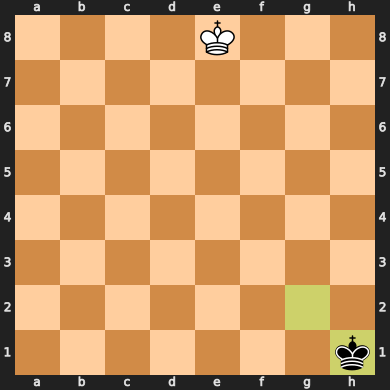

In [24]:
board

In [19]:
dir(board)

['__annotations__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_algebraic',
 '_algebraic_and_push',
 '_algebraic_without_suffix',
 '_attacked_for_king',
 '_attackers_mask',
 '_board_state',
 '_clear_board',
 '_ep_skewered',
 '_epd_operations',
 '_from_chess960',
 '_generate_evasions',
 '_is_halfmoves',
 '_is_safe',
 '_parse_epd_ops',
 '_push_capture',
 '_reduces_castling_rights',
 '_remove_piece_at',
 '_repr_svg_',
 '_reset_board',
 '_set_board_fen',
 '_set_castling_fen',
 '_set_chess960_pos',
 '_set_piece_at',
 '_set_piece_map',
 '_slider_blockers',
 '_stack',
 '_to_chess960',
 '_transposition_key',
 '_valid_ep_square',
 'aliases',
